In [46]:
! pip install -qU langgraph langchain-google-genai

In [47]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import START,END,StateGraph
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image,display
import os
from dotenv import load_dotenv
from typing_extensions import TypedDict

load_dotenv()

True

In [70]:
class State(TypedDict):
    topic:str
    subjects:list[str]
    generated_jokes:list[str]
    best_joke:str
    

api_key = os.getenv('GEMINI_API_KEY')

llm:ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model='gemini-1.5-flash',api_key=api_key)
# llm.invoke("Hello")

In [72]:
def subjects_generator(state:State):
    ''' This function is responsible for providing three subjects in an Array form of the topic provided by user'''
    prompt = f"You are a smart AI Agent and you have to generate three subjects from this topic : {state['topic']}. for example: ['Retiles','Birds','Mammals']"
    response = llm.invoke(prompt).content
    return {'subjects':response}

def jokes_generator(state:State):
    ''' This function is responsible for generating 3 jokes for the topic provided by user and the subjects provided by subjects_generator function'''
    prompt = f"""You are a smart AI Agent and must generate exactly three jokes based on the topic: {state['topic']} and these subjects: {state['subjects']}. 
    Respond in this exact format: ["Joke 1", "Joke 2", "Joke 3"] without any extra formatting, code blocks, or explanations."""
    response = llm.invoke(prompt).content
    return {'generated_jokes':response}


def best_joke_selected(state:State):
    ''' This function is responsible for choosing the best joke generated by the AI from three jokes'''
    prompt = f"You are a smart AI Agent and you hve to pick the best joke from these jokes Array:{state['generated_jokes']}. And return it in str format for example: 'I asked my dog what is two minus two… he said nothing.'"
    response = llm.invoke(prompt).content
    return {'best_joke':response}

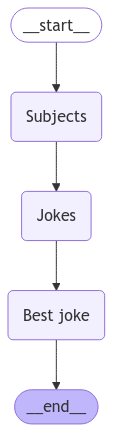

In [73]:
workflow : StateGraph = StateGraph(State)
workflow.add_node('Subjects',subjects_generator)
workflow.add_node('Jokes',jokes_generator)
workflow.add_node('Best joke',best_joke_selected)

workflow.add_edge(START,'Subjects')
workflow.add_edge('Subjects','Jokes')
workflow.add_edge('Jokes','Best joke')
workflow.add_edge('Best joke',END)

graph:CompiledStateGraph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [75]:
graph.invoke({'topic':'AI'})

{'topic': 'AI',
 'subjects': "['AI Ethics and Societal Impact', 'AI Algorithms and Machine Learning', 'AI Applications in Healthcare']",
 'generated_jokes': '["Why was the AI ethicist sad? Because it had too many ethical dilemmas and not enough RAM.", "Why did the machine learning algorithm break up with the dataset? Because they had too many differences and not enough common ground.", "Why did the AI doctor get fired? Because it kept diagnosing patients with \'machine malfunction\' instead of actual illnesses."]',
 'best_joke': '"Why did the AI doctor get fired? Because it kept diagnosing patients with \'machine malfunction\' instead of actual illnesses."'}